In [89]:
## Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon
from scipy.stats import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLM
import pingouin as pg
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.sandwich_covariance import cov_cluster

In [90]:
## Import data
responses_df = pd.read_csv("/Users/acapp/Desktop/Engagement & Realism Responses.csv")

## Data Cleaning & Preparation

In [91]:
clean_responses_df = responses_df.drop(labels=[0,1], axis=0)

In [92]:
display(clean_responses_df)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,ChallengeV3,VarietyV3,ParticipantID,Condition1,Condition2,Condition3,Completed1,Completed2,Completed3,CurrentCondition
2,2025-04-21 22:00:30,2025-04-21 22:14:10,0,62.250.126.58,100,820,1,2025-04-21 22:14:11,R_8nNUFZqMTMJPdvP,NaN,...,6,9,P1401444,random,rule_based,ml,false,false,false,ml
3,2025-04-22 19:28:22,2025-04-22 19:44:52,0,79.8.71.232,100,990,1,2025-04-22 19:44:53,R_27Ny95Hdxz33z9y,NaN,...,4,7,P3477635,random,rule_based,ml,false,false,false,ml
4,2025-04-22 22:00:57,2025-04-22 22:10:04,0,87.11.221.112,100,546,1,2025-04-22 22:10:04,R_12VXHMc9wvtPfhX,NaN,...,5,9,P6221744,random,rule_based,ml,false,false,false,ml
5,2025-04-22 22:10:37,2025-04-22 22:27:07,0,37.251.49.138,100,989,1,2025-04-22 22:27:07,R_2E5tw8aACIIyfDP,NaN,...,3,9,P9154182,random,rule_based,ml,false,false,false,ml
6,2025-04-22 21:02:16,2025-04-22 22:41:32,0,62.250.126.58,100,5955,1,2025-04-22 22:41:32,R_7RX5v56l00ku6zb,NaN,...,5,7,P3472823,random,rule_based,ml,false,false,false,ml
7,2025-04-22 23:18:52,2025-04-22 23:33:08,0,87.208.27.193,100,856,1,2025-04-22 23:33:09,R_14MN3pbQYKnCM6J,NaN,...,4,9,P2181027,random,rule_based,ml,false,false,false,ml
8,2025-04-23 00:13:18,2025-04-23 00:18:11,0,62.250.126.58,100,293,1,2025-04-23 00:18:12,R_8OreGXXU1aVbNEs,NaN,...,5,9,P9851015,random,rule_based,ml,false,false,false,ml
9,2025-04-23 09:40:54,2025-04-23 09:51:25,0,104.28.30.83,100,631,1,2025-04-23 09:51:25,R_8PdyHTJKNmohv4e,NaN,...,5,11,P161089,random,rule_based,ml,false,false,false,ml
10,2025-04-23 00:10:54,2025-04-23 11:35:57,0,62.250.126.58,100,41102,1,2025-04-23 11:35:57,R_2U5w8r6rovg8f0j,NaN,...,5,9,P8554708,random,rule_based,ml,false,false,false,ml
11,2025-04-23 11:26:04,2025-04-23 11:55:45,0,92.109.255.41,100,1780,1,2025-04-23 11:55:45,R_2NEfupwNDSIcL7v,NaN,...,5,10,P2744460,random,rule_based,ml,false,false,false,ml


- Splitting the rows

In [93]:
## Identify the column names ending with each version denomination
condition1_cols = [col for col in clean_responses_df.columns if col.endswith('V1') or col.endswith('V1.1') ]

condition2_cols = [col for col in clean_responses_df.columns if col.endswith('V2') or col.endswith('V2.1')]

condition3_cols = [col for col in clean_responses_df.columns if col.endswith('V3') or col.endswith('V3.1')]

In [94]:
## Create a dataset per version
version1_df = clean_responses_df[['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + condition1_cols].copy()

version2_df = clean_responses_df[['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + condition2_cols].copy()

version3_df = clean_responses_df[['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + condition3_cols].copy()

In [95]:
## Rename the columns to remove condition suffix
version1_df.columns = ['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + [col.replace('V1', '') for col in condition1_cols]

version2_df.columns = ['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + [col.replace('V2', '') for col in condition2_cols]

version3_df.columns = ['ParticipantID', 'Age','Gender','Gaming Knowledge','Gaming Time'] + [col.replace('V3', '') for col in condition3_cols]


In [96]:
## Add a condition identifier
version1_df['condition'] = 1 # Random

version2_df['condition'] = 2 # Rule-based

version3_df['condition'] = 3 # ML

In [97]:
## Adding information about the specific condition --> 1-Random, etc.
version1_df['condition_info'] = clean_responses_df['Condition1']

version2_df['condition_info'] = clean_responses_df['Condition2']

version3_df['condition_info'] = clean_responses_df['Condition3']

In [98]:
long_responses_df = pd.concat([version1_df, version2_df, version3_df], ignore_index=True)

In [99]:
## Recode Variety question
long_responses_df['Variety'] = long_responses_df['Variety'].astype(int)

variety_correct = {6:1,7:2, 8:3,
                   9:4, 10:5, 11:6, 12:7}

for row in range(len(long_responses_df)):
    for key, value in variety_correct.items():
        if long_responses_df.loc[long_responses_df.index[row], 'Variety'] == key:
            long_responses_df.loc[long_responses_df.index[row], 'Variety'] = value

## Altenrative approach: long_responses_df['Variety'] = long_responses_df['Variety'].replace(variety_correct)

In [100]:
display(long_responses_df)

,ParticipantID,Age,Gender,Gaming Knowledge,Gaming Time,Engagement,Realism,Engagement.1,Challenge,Variety,condition,condition_info
0,P1401444,23,2,3,1,3,3,3,6,3,1,random
1,P3477635,22,1,7,2,5,6,3,5,5,1,random
2,P6221744,21,1,6,2,4,5,2,3,2,1,random
3,P9154182,21,1,7,4,3,4,3,4,1,1,random
4,P3472823,21,1,7,1,5,6,6,5,4,1,random
...,...,...,...,...,...,...,...,...,...,...,...,...
145,P2892415,35,1,5,1,6,5,3,5,3,3,ml
146,P3213212,29,2,3,1,7,6,6,7,6,3,ml
147,P7626800,35,2,1,1,6,6,7,7,6,3,ml
148,P1167947,36,2,2,1,5,3,5,4,5,3,ml


## Data Exploration

- Data Type

In [101]:
long_responses_df.dtypes

ParticipantID       object
Age                 object
Gender              object
Gaming Knowledge    object
Gaming Time         object
Engagement          object
Realism             object
Engagement.1        object
Challenge           object
Variety              int64
condition            int64
condition_info      object
dtype: object

In [102]:
## Prepare data types function
def prepare_data(df):
    ## Convert ordinal variables to categorical with ordering 
    ordinal_vars = ['Engagement', 'Engagement.1', 'Realism', 'Challenge', 'Variety', 'Gaming Knowledge','Gaming Time', 'Age']

    for var in ordinal_vars:
        df[var] = pd.to_numeric(df[var], errors='coerce').astype(int)
    
    ## Convert categorical variables
    df['Gender'] = pd.Categorical(df['Gender'])
    df['condition_info'] = pd.Categorical(df['condition_info'], 
                                        categories=['random', 'rule_based', 'ml'],
                                        ordered=False)
    
    df['condition'] = pd.Categorical(df['condition'], ordered= True)

    ## Retain ParticipantID
    df['ParticipantID'] = df['ParticipantID']
    
    return df

In [103]:
prepared_responses_df = prepare_data(long_responses_df)

In [104]:
prepared_responses_df.dtypes

ParticipantID         object
Age                    int64
Gender              category
Gaming Knowledge       int64
Gaming Time            int64
Engagement             int64
Realism                int64
Engagement.1           int64
Challenge              int64
Variety                int64
condition           category
condition_info      category
dtype: object

In [105]:
display(prepared_responses_df)

,ParticipantID,Age,Gender,Gaming Knowledge,Gaming Time,Engagement,Realism,Engagement.1,Challenge,Variety,condition,condition_info
0,P1401444,23,2,3,1,3,3,3,6,3,1,random
1,P3477635,22,1,7,2,5,6,3,5,5,1,random
2,P6221744,21,1,6,2,4,5,2,3,2,1,random
3,P9154182,21,1,7,4,3,4,3,4,1,1,random
4,P3472823,21,1,7,1,5,6,6,5,4,1,random
...,...,...,...,...,...,...,...,...,...,...,...,...
145,P2892415,35,1,5,1,6,5,3,5,3,3,ml
146,P3213212,29,2,3,1,7,6,6,7,6,3,ml
147,P7626800,35,2,1,1,6,6,7,7,6,3,ml
148,P1167947,36,2,2,1,5,3,5,4,5,3,ml


## Dependent Variable Creation

- Engagement

In [106]:
## Measure concistency with Cronbach's alpha
engagement_df = prepared_responses_df[['Engagement','Engagement.1']]
alpha_result_engagement = pg.cronbach_alpha(data=engagement_df)

print(f"Cronbach's alpha: {alpha_result_engagement[0].round(3)}")

Cronbach's alpha: 0.825


In [107]:
## Aggregating by mean
prepared_responses_df['Engagement'] = prepared_responses_df['Engagement'].astype(int)
prepared_responses_df['Engagement.1'] = prepared_responses_df['Engagement.1'].astype(int)

prepared_responses_df['Engagement_DV1'] = prepared_responses_df[['Engagement', 'Engagement.1']].mean(axis=1).round(0)

prepared_responses_df['Engagement_DV1'] = pd.to_numeric(prepared_responses_df['Engagement_DV1'], errors='coerce').astype(int)

In [108]:
## Remove Engagement columns
prepared_responses_df = prepared_responses_df.drop(['Engagement','Engagement.1'], axis= 1)

- Realism

In [109]:
## Measure concistency with Cronbach's alpha
realism_df = prepared_responses_df[['Realism','Variety']]
alpha_result_realism = pg.cronbach_alpha(data=realism_df)

print(f"Cronbach's alpha: {alpha_result_realism[0].round(3)}")

Cronbach's alpha: 0.431


In [110]:
## Rename the other dependent variables
prepared_responses_df = prepared_responses_df.rename(columns = {
    'Realism': 'Realism_DV2',
    'Variety': 'Variety_DV3'
})

## Descriptive Statistics

In [111]:
## Temporary data frame to convert fields to numeric
prepared_responses_df_tmp = prepared_responses_df

## Drop meta columns
prepared_responses_df_tmp = prepared_responses_df_tmp.drop(['ParticipantID', 'condition_info'], axis=1)

## Converting fields to numeric
prepared_responses_df_tmp = prepared_responses_df_tmp.apply(pd.to_numeric, errors='coerce')

## Calculating summary statistics
summary_stats = prepared_responses_df_tmp.describe()

summary_stats_T = summary_stats.T.round(3)

print(tabulate(summary_stats_T, headers='keys', tablefmt='grid'))

+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
|                  |   count |   mean |   std |   min |   25% |   50% |   75% |   max |
+==================+=========+========+=======+=======+=======+=======+=======+=======+
| Age              |     150 | 24.08  | 4.988 |    20 |    21 |    22 |    24 |    45 |
+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
| Gender           |     150 |  1.34  | 0.475 |     1 |     1 |     1 |     2 |     2 |
+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
| Gaming Knowledge |     150 |  4.5   | 1.809 |     1 |     3 |     5 |     6 |     7 |
+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
| Gaming Time      |     150 |  1.72  | 1.043 |     1 |     1 |     1 |     2 |     5 |
+------------------+---------+--------+-------+-------+-------+-------+-------+-------+
| Realism_DV2      |     150 |  

In [112]:
## Distribution of IVs
variables = ['Gender','Gaming Knowledge', 'Gaming Time', 'Realism_DV2','Challenge','Variety_DV3','condition','Engagement_DV1']

for var in variables:
    print(prepared_responses_df[var].value_counts())
    print("\n")

Gender
1    99
2    51
Name: count, dtype: int64


Gaming Knowledge
3    27
7    27
6    27
2    24
5    24
4    18
1     3
Name: count, dtype: int64


Gaming Time
1    84
2    42
3    12
4     6
5     6
Name: count, dtype: int64


Realism_DV2
6    43
5    40
3    19
4    19
2    19
7     6
1     4
Name: count, dtype: int64


Challenge
5    60
6    27
4    20
2    19
3    14
7    10
Name: count, dtype: int64


Variety_DV3
5    44
6    41
4    22
3    16
2    16
7     9
1     2
Name: count, dtype: int64


condition
1    50
2    50
3    50
Name: count, dtype: int64


Engagement_DV1
6    46
4    41
5    29
3    15
2    15
7     3
1     1
Name: count, dtype: int64




## Model Preparation

In [113]:
# ## Define Likert scale mapping
# likert_mapping = {
#     1: 'Strongly Disagree',
#     2: 'Disagree',
#     3: 'Somewhat Disagree',
#     4: 'Neutral',
#     5: 'Somewhat Agree',
#     6: 'Agree',
#     7: 'Strongly Agree'
# }

# ## Define gender scale mapping
# gender_mapping = {
#     1: 'male',
#     2: 'female',
#     3: 'other'
# }

# ## Define gaming time scale mapping
# gaming_time_mapping = {
#     1: '0-5',
#     2:'6-10',
#     3: '11-15',
#     4: '16-20',
#     5: '20+'
# }

# ## Define gaming knowledge scale mapping
# gaming_knowledge_mapping = {
#     1: 'Novice',
#     2: 'Newcomer',
#     3: 'Learner',
#     4: 'Competent',
#     5: 'Advanced',
#     6: 'Proficient',
#     7: 'Expert'
# }

## Define condition scale mapping
condition_mapping = {
    1: 'Random',
    2: 'Rule-based',
    3: 'Machine-learning'
}

In [114]:
## Map the condition with the apporpriate names
prepared_responses_df['condition'] = prepared_responses_df['condition'].map(condition_mapping)

In [115]:
## Get dummies for conditions
condition_dummies = pd.get_dummies(prepared_responses_df['condition'], prefix= 'condition')

## Concatenate
prepared_responses_df = pd.concat([prepared_responses_df, condition_dummies], axis=1)

## Drop condition related variables
prepared_responses_df.drop(['condition_info', 'condition'], axis= 1, inplace= True)

## Make a copy
prepared_df = prepared_responses_df.copy()

In [116]:
## Show the column names
print("Created dummy variables:")
for col in prepared_df.columns:
    print(col)

Created dummy variables:
ParticipantID
Age
Gender
Gaming Knowledge
Gaming Time
Realism_DV2
Challenge
Variety_DV3
Engagement_DV1
condition_Random
condition_Rule-based
condition_Machine-learning


In [117]:
prepared_df

,ParticipantID,Age,Gender,Gaming Knowledge,Gaming Time,Realism_DV2,Challenge,Variety_DV3,Engagement_DV1,condition_Random,condition_Rule-based,condition_Machine-learning
0,P1401444,23,2,3,1,3,6,3,3,True,False,False
1,P3477635,22,1,7,2,6,5,5,4,True,False,False
2,P6221744,21,1,6,2,5,3,2,3,True,False,False
3,P9154182,21,1,7,4,4,4,1,3,True,False,False
4,P3472823,21,1,7,1,6,5,4,6,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
145,P2892415,35,1,5,1,5,5,3,4,False,False,True
146,P3213212,29,2,3,1,6,7,6,6,False,False,True
147,P7626800,35,2,1,1,6,7,6,6,False,False,True
148,P1167947,36,2,2,1,3,4,5,5,False,False,True


In [118]:
prepared_df.dtypes

ParticipantID                   object
Age                              int64
Gender                        category
Gaming Knowledge                 int64
Gaming Time                      int64
Realism_DV2                      int64
Challenge                        int64
Variety_DV3                      int64
Engagement_DV1                   int64
condition_Random                  bool
condition_Rule-based              bool
condition_Machine-learning        bool
dtype: object

## Hypothesis Testing

### Hypothessi I (Firedman & Wilcoxon)

In [119]:
condition1_df = prepared_df.loc[prepared_df['condition_Random'] == 1]
condition2_df = prepared_df.loc[prepared_df['condition_Rule-based'] == 1]
condition3_df = prepared_df.loc[prepared_df['condition_Machine-learning'] == 1]

- DV 1: Engagement

In [120]:
## Friedman Test
friedman_test_DV1 = friedmanchisquare(
    condition1_df['Engagement_DV1'],
    condition2_df['Engagement_DV1'],
    condition3_df['Engagement_DV1']
)

print("\nFriedman test statistic:", friedman_test_DV1.statistic)
print("Friedman test p-value:", friedman_test_DV1.pvalue)


Friedman test statistic: 26.17808219178084
Friedman test p-value: 2.0677673743092326e-06


In [121]:
## Wilcoxon Test
## Data prep
condition1_values = condition1_df['Engagement_DV1']
condition2_values = condition2_df['Engagement_DV1']
condition3_values = condition3_df['Engagement_DV1']

## Perform pairwise Wilcoxon tests
## Condition 1 vs Condition 2
wilcoxon_1_2 = wilcoxon(condition1_values, condition2_values)
print("Wilcoxon test (Condition 1 vs 2):")
print("Statistic:", wilcoxon_1_2.statistic)
print("p-value:", wilcoxon_1_2.pvalue)

## Condition 1 vs Condition 3
wilcoxon_1_3 = wilcoxon(condition1_values, condition3_values)
print("\nWilcoxon test (Condition 1 vs 3):")
print("Statistic:", wilcoxon_1_3.statistic)
print("p-value:", wilcoxon_1_3.pvalue)

## Condition 2 vs Condition 3
wilcoxon_2_3 = wilcoxon(condition2_values, condition3_values)
print("\nWilcoxon test (Condition 2 vs 3):")
print("Statistic:", wilcoxon_2_3.statistic)
print("p-value:", wilcoxon_2_3.pvalue)

Wilcoxon test (Condition 1 vs 2):
Statistic: 120.5
p-value: 0.0006112252214317845

Wilcoxon test (Condition 1 vs 3):
Statistic: 107.5
p-value: 2.0864114060026898e-05

Wilcoxon test (Condition 2 vs 3):
Statistic: 118.0
p-value: 0.13358869424861658


- DV 2: Realism

In [122]:
## Friedman Test
friedman_test_DV1 = friedmanchisquare(
    condition1_df['Realism_DV2'],
    condition2_df['Realism_DV2'],
    condition3_df['Realism_DV2']
)

print("\nFriedman test statistic:", friedman_test_DV1.statistic)
print("Friedman test p-value:", friedman_test_DV1.pvalue)


Friedman test statistic: 9.961538461538439
Friedman test p-value: 0.006868776850292433


In [123]:
## Wilcoxon Test
## Data prep
condition1_values = condition1_df['Realism_DV2']
condition2_values = condition2_df['Realism_DV2']
condition3_values = condition3_df['Realism_DV2']

## Perform pairwise Wilcoxon tests
## Condition 1 vs Condition 2
wilcoxon_1_2 = wilcoxon(condition1_values, condition2_values)
print("Wilcoxon test (Condition 1 vs 2):")
print("Statistic:", wilcoxon_1_2.statistic)
print("p-value:", wilcoxon_1_2.pvalue)

## Condition 1 vs Condition 3
wilcoxon_1_3 = wilcoxon(condition1_values, condition3_values)
print("\nWilcoxon test (Condition 1 vs 3):")
print("Statistic:", wilcoxon_1_3.statistic)
print("p-value:", wilcoxon_1_3.pvalue)

## Condition 2 vs Condition 3
wilcoxon_2_3 = wilcoxon(condition2_values, condition3_values)
print("\nWilcoxon test (Condition 2 vs 3):")
print("Statistic:", wilcoxon_2_3.statistic)
print("p-value:", wilcoxon_2_3.pvalue)

Wilcoxon test (Condition 1 vs 2):
Statistic: 130.0
p-value: 0.0007386842647552933

Wilcoxon test (Condition 1 vs 3):
Statistic: 171.0
p-value: 0.0019992989667593874

Wilcoxon test (Condition 2 vs 3):
Statistic: 257.5
p-value: 0.4865148344207262


- DV 3: Variety

In [124]:
## Friedman Test
friedman_test_DV1 = friedmanchisquare(
    condition1_df['Variety_DV3'],
    condition2_df['Variety_DV3'],
    condition3_df['Variety_DV3']
)

print("\nFriedman test statistic:", friedman_test_DV1.statistic)
print("Friedman test p-value:", friedman_test_DV1.pvalue)


Friedman test statistic: 3.8741258741258484
Friedman test p-value: 0.1441266377492399


In [125]:
## Wilcoxon Test
## Data prep
condition1_values = condition1_df['Variety_DV3']
condition2_values = condition2_df['Variety_DV3']
condition3_values = condition3_df['Variety_DV3']

## Perform pairwise Wilcoxon tests
## Condition 1 vs Condition 2
wilcoxon_1_2 = wilcoxon(condition1_values, condition2_values)
print("Wilcoxon test (Condition 1 vs 2):")
print("Statistic:", wilcoxon_1_2.statistic)
print("p-value:", wilcoxon_1_2.pvalue)

## Condition 1 vs Condition 3
wilcoxon_1_3 = wilcoxon(condition1_values, condition3_values)
print("\nWilcoxon test (Condition 1 vs 3):")
print("Statistic:", wilcoxon_1_3.statistic)
print("p-value:", wilcoxon_1_3.pvalue)

## Condition 2 vs Condition 3
wilcoxon_2_3 = wilcoxon(condition2_values, condition3_values)
print("\nWilcoxon test (Condition 2 vs 3):")
print("Statistic:", wilcoxon_2_3.statistic)
print("p-value:", wilcoxon_2_3.pvalue)

Wilcoxon test (Condition 1 vs 2):
Statistic: 280.5
p-value: 1.0

Wilcoxon test (Condition 1 vs 3):
Statistic: 274.5
p-value: 0.15312904316637418

Wilcoxon test (Condition 2 vs 3):
Statistic: 121.5
p-value: 0.030358372151657268


### Hypothessi I (Mixed Effects Models)

Descriptive Statistics

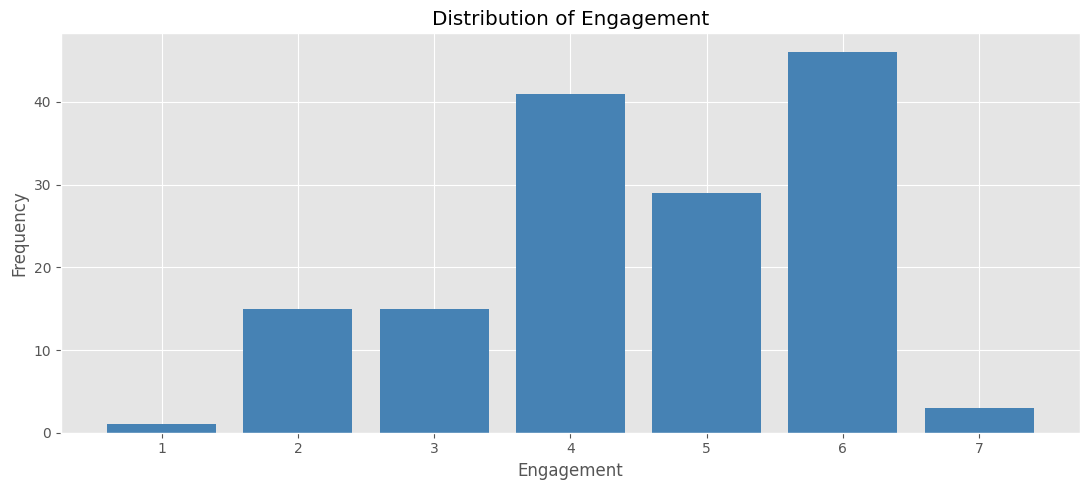

In [126]:
## Engagement_DV1 distribution
## Calculate counts per category
counts = prepared_df['Engagement_DV1'].value_counts()

## Plot as bar chart
plt.figure(figsize=(11,5))
plt.bar(counts.index, counts.values, color = 'steelblue')

## Labelling
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.title('Distribution of Engagement')

## Additional settings
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

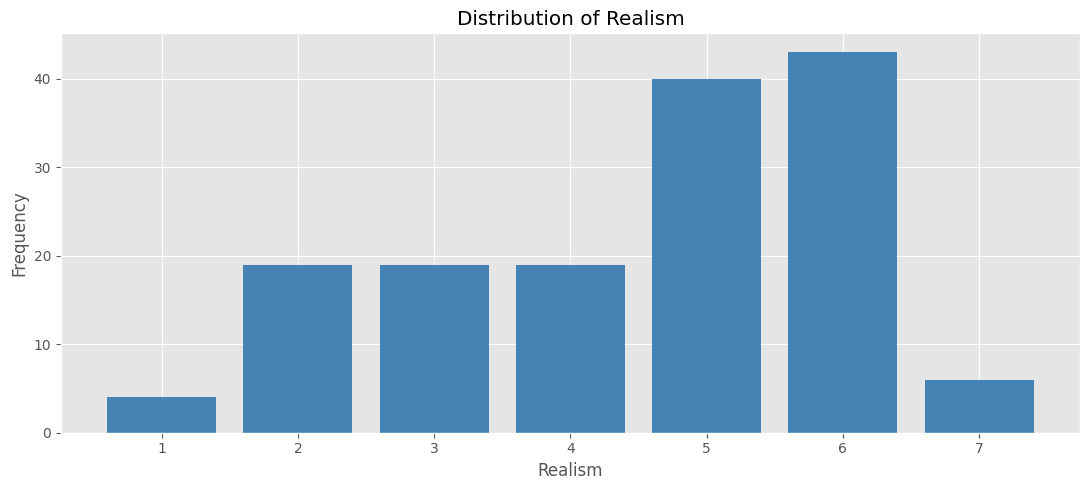

In [127]:
## Realism_DV2 distribution
## Calculate counts per category
counts = prepared_df['Realism_DV2'].value_counts()

## Plot as bar chart
plt.figure(figsize=(11,5))
plt.bar(counts.index, counts.values, color = 'steelblue')

## Labelling
plt.xlabel('Realism')
plt.ylabel('Frequency')
plt.title('Distribution of Realism')

## Additional settings
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

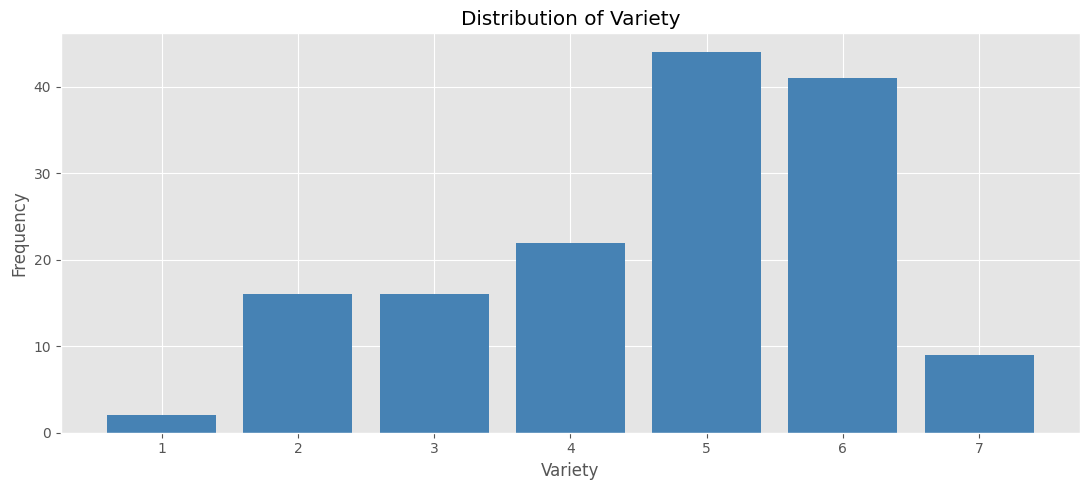

In [128]:
## Variety_DV3 distribution
## Calculate counts per category
counts = prepared_df['Variety_DV3'].value_counts()

## Plot as bar chart
plt.figure(figsize=(11,5))
plt.bar(counts.index, counts.values, color = 'steelblue')

## Labelling
plt.xlabel('Variety')
plt.ylabel('Frequency')
plt.title('Distribution of Variety')

## Additional settings
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

### Model Specification

In [129]:
## VIF Test
def calculate_vif(X):
    ## Create a dataframe to store VIF values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    
    # #Calculate VIF for each variable
    vif_data["VIF"] = [variance_inflation_factor(X.values, i).round(3) for i in range(X.shape[1])]
    
    ## Sort by VIF value
    vif_data = vif_data.sort_values("VIF", ascending=False)
    
    return vif_data

VIF Test for X

In [130]:
## Drop one condition as its the one of reference (Random)
prepared_df.drop(['condition_Random'], axis= 1, inplace= True)

In [131]:
X = prepared_df.drop(['Realism_DV2','Variety_DV3','Engagement_DV1','ParticipantID'],axis=1).astype(int)

In [132]:
vif_results = calculate_vif(X)
display(vif_results)

,Variable,VIF
0,Age,14.825
4,Challenge,9.966
2,Gaming Knowledge,7.972
1,Gender,7.490
3,Gaming Time,4.892
6,condition_Machine-learning,2.016
5,condition_Rule-based,1.983


In [133]:
## Examining correlations
correlations = X.corr()['Age'].sort_values(ascending=False)
print(correlations)

Age                           1.000000e+00
Challenge                     2.562399e-02
condition_Rule-based         -2.242674e-16
condition_Machine-learning   -3.893378e-16
Gender                       -1.155020e-02
Gaming Time                  -1.465341e-01
Gaming Knowledge             -2.298569e-01
Name: Age, dtype: float64


In [134]:
## Centering Age as required in the model
X['Age_centered'] = X['Age'] - X['Age'].mean()

## Remove original age
X = X.drop('Age', axis=1) 

## Rerun VIF
vif_results = calculate_vif(X)
display(vif_results)

,Variable,VIF
3,Challenge,7.932
1,Gaming Knowledge,7.662
0,Gender,5.871
2,Gaming Time,4.733
5,condition_Machine-learning,2.009
4,condition_Rule-based,1.968
6,Age_centered,1.035


In [135]:
## Standardize variables causing multicollinearity
for var in ['Challenge', 'Gaming Knowledge']:
    if var in X.columns:
        X[f'{var}_std'] = (X[var] - X[var].mean()) / X[var].std()

## Drop the original ones
X.drop([ 'Gaming Knowledge', 'Challenge'], axis= 1, inplace= True)

In [136]:
## Rerun VIF
vif_results = calculate_vif(X)
display(vif_results)

,Variable,VIF
0,Gender,4.025
1,Gaming Time,3.518
3,condition_Machine-learning,1.906
2,condition_Rule-based,1.870
6,Gaming Knowledge_std,1.587
5,Challenge_std,1.124
4,Age_centered,1.062


Model Fitting

In [137]:
## Fixed effects model
def fixed_effects_model(iv,dv,df):
    iv = iv.rename(columns = {'Gaming Knowledge_std': 'Gaming_Knowledge_std', 
                        'Gaming Time_std': 'Gaming_Time_std',
                        'condition_Machine-learning': 'condition_Machine_learning',
                        'condition_Rule-based':'condition_Rule_based'})
    
    participant_dummies = pd.get_dummies(df['ParticipantID'], prefix= 'participant', drop_first= True)
    X_with_fe = pd.concat([iv,participant_dummies], axis=1)

    ## Transform all to int
    X_with_fe = X_with_fe.apply(lambda col: col.astype(int))

    ## Fit the model
    model_fe = sm.OLS(dv,X_with_fe)
    results = model_fe.fit()
    return results


In [138]:
## Random Effects Model
def random_effects_model(iv, dv, df):
    
    iv = iv.rename(columns = {'Gaming Knowledge_std': 'Gaming_Knowledge_std', 
                        'Gaming Time_std': 'Gaming_Time_std',
                        'condition_Machine-learning': 'condition_Machine_learning',
                        'condition_Rule-based':'condition_Rule_based'})
    
    ## ensure predictors and outcome are numeric
    iv = iv.apply(lambda col: np.array(col).astype(float))
    y  = dv.apply(lambda col: np.array(col).astype(float))

    ## insert constant at position 0
    iv.insert(0, 'constant', 1.0)

    ## fit the random‐intercepts model
    model_re = MixedLM(endog=y,
                       exog=iv,
                       groups=np.array(df['ParticipantID']))
    
    results = model_re.fit()
    return results

In [139]:
## Hausman Test
def hausman_test(fe_results, re_results):
    # Extract coefficients and covariance matrices
    b_fe = fe_results.params
    b_re = re_results.params
    
    # Calculate common coefficients
    common_coef = [c for c in b_fe.index if c in b_re.index]
    
    # Extract variance matrices
    v_fe = fe_results.cov_params()
    v_re = re_results.cov_params()
    
    # Calculate test statistic
    diff = b_fe[common_coef] - b_re[common_coef]
    var_diff = v_fe.loc[common_coef, common_coef] - v_re.loc[common_coef, common_coef]
    
    # Hausman test statistic
    h_stat = diff.T @ np.linalg.inv(var_diff) @ diff
    df = len(common_coef)
    p_value = 1 - stats.chi2.cdf(h_stat, df)

    print("Hausman Test Results:")
    print(f"\nHausman Test Statistic: {h_stat.round(4)}")
    print(f"Hausman Test p-value: {p_value.round(4)}")

    ## Interpretation
    print("\nInterpretation:")
    if p_value > 0.05:
        print("The null is not rejected in favor of the Random Effects model")
    else:
        print("The null hypothesis is rejected in favor of the Fixed Effects model")
    
    return h_stat, p_value

In [140]:
## Test normality assumption with Q-Q Plot and Shapiro-Wilk Test
def test_normality(model):
    ## Extract residuals
    residuals = model.resid
    
    ## Plotting Settings
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ## Plot 1: Q-Q plot of Residuls
    qqplot(residuals, line='s', ax=ax1)
    ax1.set_title('Q-Q Plot of Residuals')
    
    ## Plot 2: Histogram with normal curve
    sns.histplot(residuals, kde=True, ax=ax2)
    ax2.set_title('Histogram of Residuals')
    
    plt.style.use('ggplot')
    plt.tight_layout()
    plt.show()
    
    ## Shapiro-Wilk test:
    shapiro_test = stats.shapiro(residuals)
    print(f"Shapiro-Wilk Test:")
    print(f"\nW Statistic: {shapiro_test[0].round(4)}")
    print(f"p-value: {shapiro_test[1].round(4)}")

    ## Extracting the interpretation
    if shapiro_test[1] < 0.05:
        print("\nThe residuals do not appear to be normally distributed (p < 0.05)")
    else:
        print("\nThe residuals appear to be normally distributed (p > 0.05)")
    
    ## Jarque-Bera Test
    jb_test = stats.jarque_bera(residuals)
    print(f"\nJarque-Bera Test:")
    print(f"\nJB Statistic: {jb_test[0].round(4)}")
    print(f"p-value: {jb_test[1].round(4)}")

    
    if jb_test[1] < 0.05:
        print("\nThe residuals do not appear to be normally distributed (p < 0.05)")
    else:
        print("\nThe residuals appear to be normally distributed (p > 0.05)")

    print("\nSkewness and Kurtosis:")
    print(f"Skewness: {stats.skew(residuals)}")
    print(f"Kurtosis: {stats.kurtosis(residuals)}")

    results_dict = {
        "Shapiro_Wilk Test": shapiro_test,
        "Jarque_Bera Test": jb_test
    }

    return results_dict

In [141]:
## Test homoscedasticity with BP test and residual vs fitted plots
def test_homoscedasticity(model):

    ## Extract residuals and fitted values
    residuals = model.resid
    fitted_values = model.fittedvalues
    
    ## Create standardized residuals
    std_resid = residuals / np.std(residuals)
    abs_std_resid = np.abs(std_resid)
    sqrt_std_resid = np.sqrt(abs_std_resid)

    ## Plot Setting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ## Plot 1: Residuals vs Fitted plot
    ax1.scatter(fitted_values, residuals, alpha=0.5, color = 'steelblue')
    ax1.axhline(y=0, color='black', linestyle='--')
    ax1.set_title('Residuals vs Fitted Values')
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')
    
    ## Add a smoothed line to better visualize patterns
    smoothed = sm.nonparametric.lowess(residuals, fitted_values, frac=0.9)
    ax1.plot(smoothed[:, 0], smoothed[:, 1], 'r-', lw=2)
    
    ## Plot 2: Scale-Location plot (sqrt of standardized residuals vs fitted values)
    ax2.scatter(fitted_values, sqrt_std_resid, alpha=0.5, color = 'steelblue')
    ax2.set_title('Scale-Location Plot')
    ax2.set_xlabel('Fitted Values')
    ax2.set_ylabel('Squared Standardized Residuals')
    
    ## Add a smoothed line
    smoothed = sm.nonparametric.lowess(sqrt_std_resid, fitted_values, frac= 0.9)
    ax2.plot(smoothed[:, 0], smoothed[:, 1], 'r-', lw=2)
    
    plt.style.use('ggplot')
    plt.tight_layout()
    plt.show()
    
    ## Breusch-Pagan test for heteroscedasticity
    vars = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    bp_test = sms.het_breuschpagan(residuals, model.model.exog)
    
    ## Print results in a readable format
    bp_dict = dict(lzip(vars, bp_test))
    print(f"Breusch-Pagan Test Results:")
    print(f"Lagrange multiplier statistic: {bp_dict['Lagrange multiplier statistic'].round(4)}")
    print(f"p-value: {bp_dict['p-value'].round(4)}")
    
    if bp_dict['p-value'] < 0.05:
        print("Evidence of heteroscedasticity (p < 0.05)")
    else:
        print("No significant evidence of heteroscedasticity (p > 0.05)")
    
    return bp_test

In [ ]:
## Compute cluster-robust standard errors
def cluster_robust_se(results, group_labels):

    ## Extract the design matrix and convert to numpy
    X = np.asarray(results.model.exog)
    
    ## Extract residuals
    resid = np.asarray(results.resid)
    
    ## Get parameter count and names
    k_vars = X.shape[1]
    param_names = results.model.exog_names
    
    ## Get unique groups
    unique_groups = np.unique(group_labels)
    n_groups = len(unique_groups)
    
    ## Initialize the 'meat' matrix
    meat = np.zeros((k_vars, k_vars))
    
    ## Calculate the clustered meat
    for g in unique_groups:
        indices = np.where(group_labels == g)[0]
        
        ## Get X and residuals for this cluster
        X_g = X[indices]
        u_g = resid[indices].reshape(-1, 1) 
        
        ## Calculate cluster contribution
        score_g = X_g.T @ u_g
        meat += score_g @ score_g.T
    
    ## Get the 'bread'
    bread = np.linalg.inv(X.T @ X)
    
    ## Calculate the sandwich
    cov_matrix = bread @ meat @ bread
    
    ## Apply sample correction
    cov_matrix = cov_matrix * (n_groups / (n_groups - 1))
    
    ## Set up a pandas df   as covariance matrix
    robust_cov = pd.DataFrame(cov_matrix, index=param_names, columns=param_names)
    
    ## Extract robust standard errors
    robust_se = np.sqrt(np.diag(cov_matrix))
    
    ## Get coefficients 
    coef = results.params[:k_vars]
    
    ## Calculate t-statistics and p-values
    t_vals = coef / robust_se
    df = n_groups - 1 
    p_vals = 2 * stats.t.sf(np.abs(t_vals), df)
    
    ## Create DataFrame
    results_df = pd.DataFrame({
        'coef': coef,
        'robust_se': robust_se,
        't': t_vals,
        'p': p_vals,
        'CI_low': coef - 1.96 * robust_se,
        'CI_high': coef + 1.96 * robust_se
    }, index=param_names)
    
    display(results_df.round(3))

    ## Return both the results DataFrame and the covariance matrix
    return results_df, robust_cov

In [143]:
## Wald Test with support for both regular and robust results
def Wald_test(model_results, coef1_name='condition_Machine_learning', coef2_name='condition_Rule_based', robust=False):
    
    ## Check if the call is using robust results
    if robust:
        results_df, cov = model_results
        # Extract coefficients from the DataFrame
        coef1 = results_df.loc[coef1_name, 'coef']
        coef2 = results_df.loc[coef2_name, 'coef']
    else:
        # Standard statsmodels results object
        coef1 = model_results.params[coef1_name]
        coef2 = model_results.params[coef2_name]
        cov = model_results.cov_params()
    
    ## Calculate difference
    diff = coef1 - coef2
    
    ## Variance of the difference
    var_diff = (cov.loc[coef1_name, coef1_name]) + (cov.loc[coef2_name, coef2_name]) - (2*cov.loc[coef1_name, coef2_name])
    
    ## Standard error of the difference
    se_diff = np.sqrt(var_diff)
    
    ## Statistic (z for standard, t for robust)
    stat = diff / se_diff
    
    ## p-value
    if robust:
        ## Use t-distribution for robust standard errors
        df = len(np.unique(model_results[0].index)) - 2  # Approximate degrees of freedom
        p_value = 2 * (1 - stats.t.cdf(abs(stat), df))
        stat_name = "t-statistic"
    else:
        ## Use normal distribution for standard errors
        p_value = 2 * (1 - stats.norm.cdf(abs(stat)))
        stat_name = "z-statistic"
    
    ## 95% Confidence interval
    ci_lower = diff - 1.96 * se_diff
    ci_upper = diff + 1.96 * se_diff
    
    ## Print results
    if robust:
        print("Wald test results (Using cluster-robust standard errors):")
    else:
        print("Wald test results:")

    print(f"\nThe coefficient difference ({coef1_name} - {coef2_name}) is: {diff.round(4)}")
    print(f"Standard Error: {se_diff.round(4)}")
    print(f"{stat_name} value: {stat.round(4)}")
    print(f"p-value: {p_value.round(4)}")
    print(f"The 95% confidence intervals are: LB = {ci_lower.round(4)} and UB = {ci_upper.round(4)}")
    
    # Return results
    results = pd.DataFrame([{
        'Difference': diff,
        'std_error': se_diff,
        'statistic': stat,
        'p_value': p_value,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }])

    return results

- DV1: Engagement 

In [144]:
## Fixed-Effects Model
engagement_fe_results = fixed_effects_model(X,prepared_df['Engagement_DV1'],prepared_df)

## Random-Effects Model
engagement_re_results = random_effects_model(X,prepared_df['Engagement_DV1'], prepared_df)

## Hausman Test
hausman_test_engagement = hausman_test(engagement_fe_results,engagement_re_results)

Hausman Test Results:

Hausman Test Statistic: -32.2617
Hausman Test p-value: 1.0

Interpretation:
The null is not rejected in favor of the Random Effects model


In [145]:
print(engagement_re_results.summary())

                Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    Engagement_DV1
No. Observations:    150        Method:                REML          
No. Groups:          50         Scale:                 0.7331        
Min. group size:     3          Log-Likelihood:        -224.6223     
Max. group size:     3          Converged:             Yes           
Mean group size:     3.0                                             
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
constant                    4.486    0.556  8.069 0.000  3.397  5.576
Gender                     -0.253    0.315 -0.803 0.422 -0.872  0.365
Gaming Time                -0.092    0.144 -0.639 0.523 -0.375  0.191
condition_Rule_based        0.746    0.171  4.353 0.000  0.410  1.082
condition_Machine_learning  0.928   

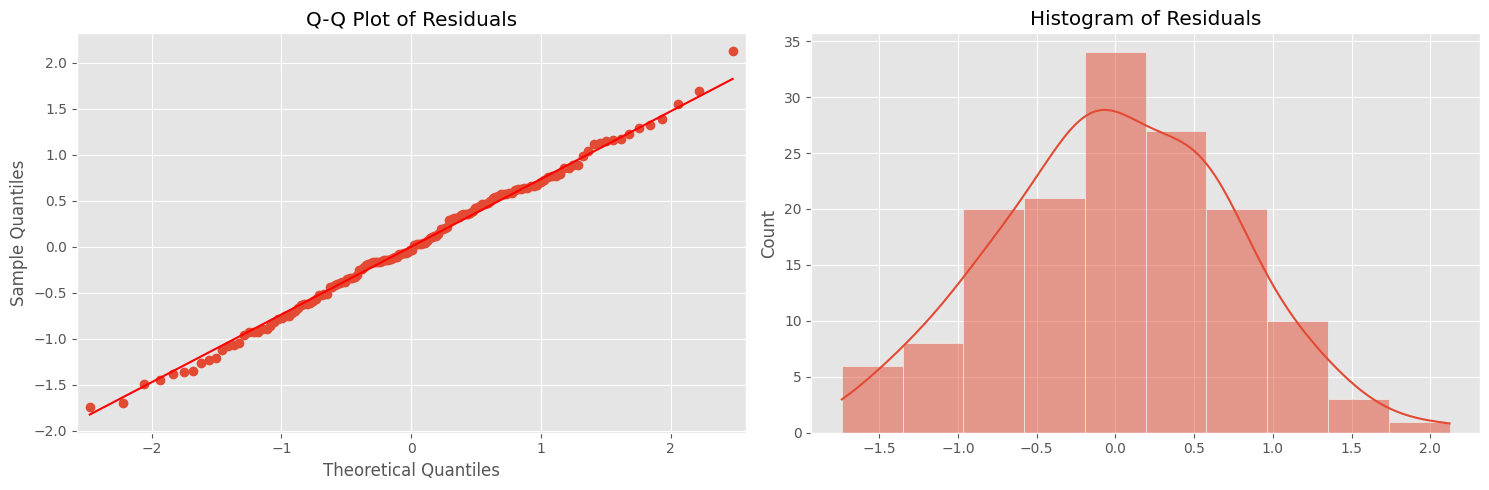

Shapiro-Wilk Test:

W Statistic: 0.9956
p-value: 0.938

The residuals appear to be normally distributed (p > 0.05)

Jarque-Bera Test:

JB Statistic: 0.334
p-value: 0.8462

The residuals appear to be normally distributed (p > 0.05)

Skewness and Kurtosis:
Skewness: 0.007399350754444307
Kurtosis: -0.23069267378671698


In [146]:
normality_engagement = test_normality(engagement_re_results)

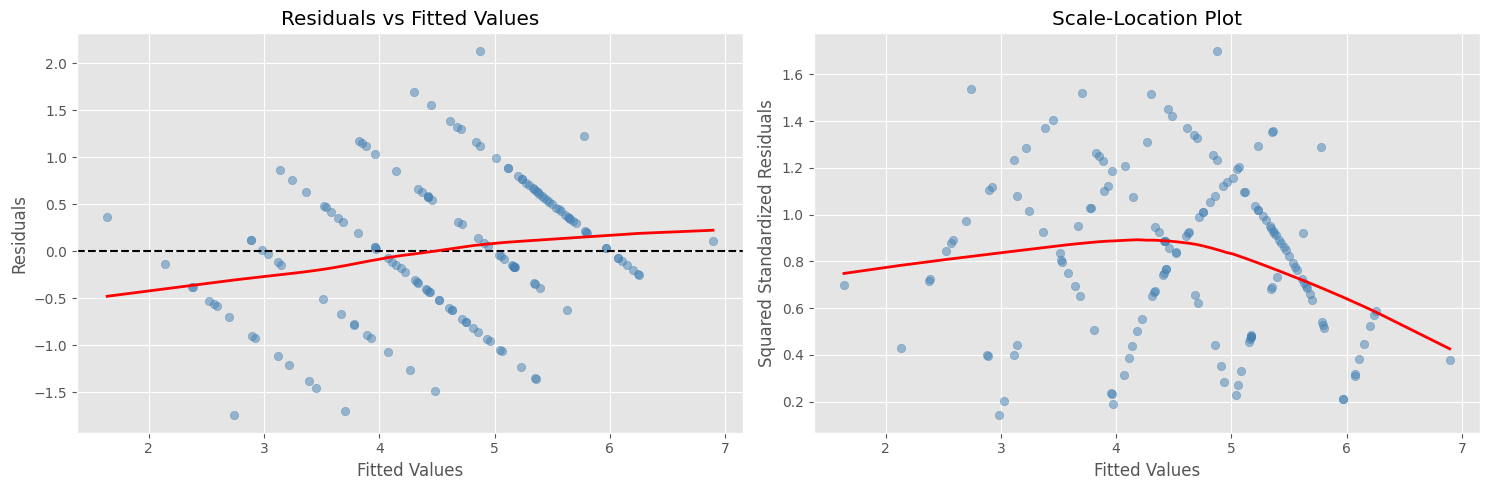

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 5.6379
p-value: 0.5826
No significant evidence of heteroscedasticity (p > 0.05)


In [147]:
homoscedasticity_engagement = test_homoscedasticity(engagement_re_results)

In [148]:
## Wald test
wald_test_engagement = Wald_test(engagement_re_results)

Wald test results:

The coefficient difference (condition_Machine_learning - condition_Rule_based) is: 0.1816
Standard Error: 0.172
z-statistic value: 1.0559
p-value: 0.291
The 95% confidence intervals are: LB = -0.1555 and UB = 0.5187


- DV2: Realism

In [149]:
## Fixed-Effects Model
realism_fe_results = fixed_effects_model(X,prepared_df['Realism_DV2'],prepared_df)

## Random-Effects Model
realism_re_results = random_effects_model(X,prepared_df['Realism_DV2'], prepared_df)

## Hausman Test
hausman_test_realism = hausman_test(realism_fe_results, realism_re_results)

Hausman Test Results:

Hausman Test Statistic: -10.0397
Hausman Test p-value: 1.0

Interpretation:
The null is not rejected in favor of the Random Effects model


In [150]:
print(realism_re_results.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Realism_DV2
No. Observations:     150         Method:                 REML       
No. Groups:           50          Scale:                  1.6724     
Min. group size:      3           Log-Likelihood:         -266.1740  
Max. group size:      3           Converged:              Yes        
Mean group size:      3.0                                            
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
constant                    2.908    0.588  4.945 0.000  1.755  4.060
Gender                      0.318    0.327  0.973 0.331 -0.323  0.958
Gaming Time                 0.331    0.150  2.198 0.028  0.036  0.626
condition_Rule_based        1.031    0.259  3.984 0.000  0.524  1.539
condition_Machine_learning  0.762   

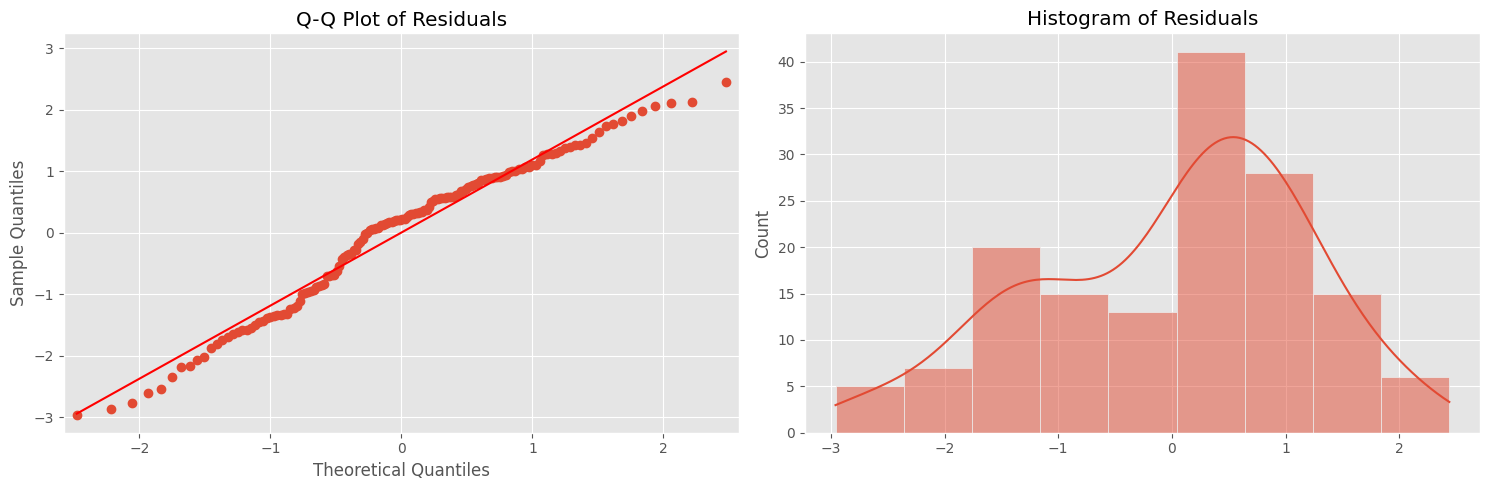

Shapiro-Wilk Test:

W Statistic: 0.97
p-value: 0.0023

The residuals do not appear to be normally distributed (p < 0.05)

Jarque-Bera Test:

JB Statistic: 6.302
p-value: 0.0428

The residuals do not appear to be normally distributed (p < 0.05)

Skewness and Kurtosis:
Skewness: -0.43775101479062956
Kurtosis: -0.491755103334365


In [151]:
normality_realism = test_normality(realism_re_results)

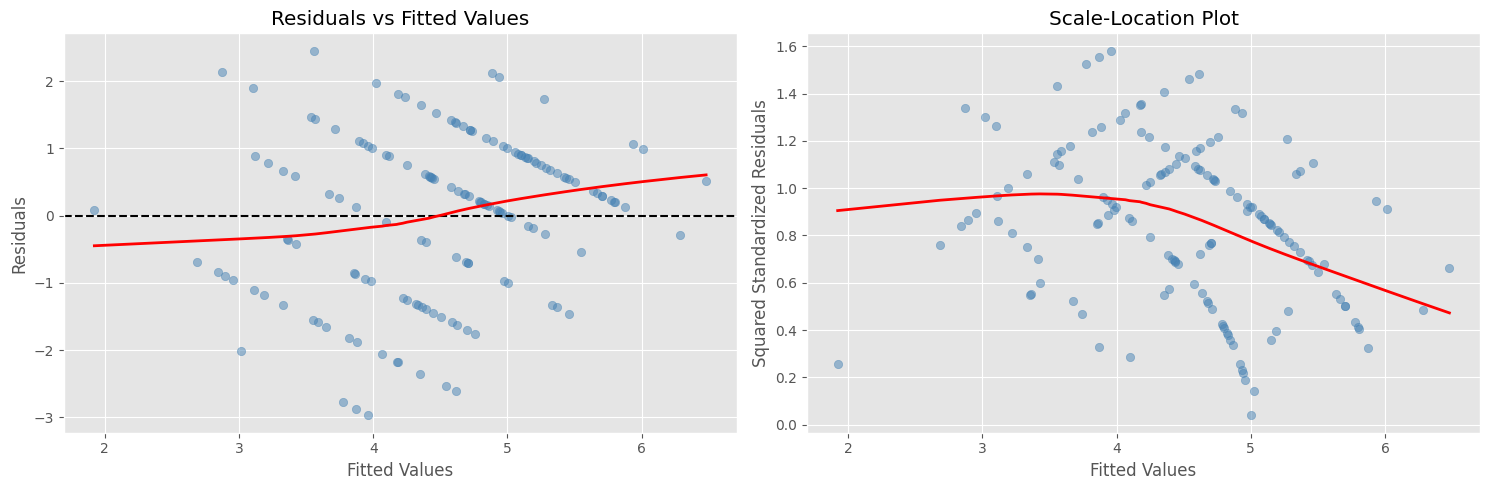

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 10.4424
p-value: 0.1649
No significant evidence of heteroscedasticity (p > 0.05)


In [152]:
homoscedasticity_realism = test_homoscedasticity(realism_re_results)

In [153]:
## Wald test
wald_test_realism = Wald_test(realism_re_results,robust= False)

Wald test results:

The coefficient difference (condition_Machine_learning - condition_Rule_based) is: -0.2694
Standard Error: 0.2594
z-statistic value: -1.0382
p-value: 0.2992
The 95% confidence intervals are: LB = -0.7779 and UB = 0.2391


- DV3: Varierty

In [154]:
## Fixed-Effects Model
variety_fe_results = fixed_effects_model(X,prepared_df['Variety_DV3'],prepared_df)

## Random-Effects Model
variety_re_results = random_effects_model(X,prepared_df['Variety_DV3'], prepared_df)

## Hausman Test
hausman_test_variety= hausman_test(variety_fe_results, variety_re_results)

Hausman Test Results:

Hausman Test Statistic: -15.6975
Hausman Test p-value: 1.0

Interpretation:
The null is not rejected in favor of the Random Effects model


In [155]:
print(variety_re_results.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Variety_DV3
No. Observations:     150         Method:                 REML       
No. Groups:           50          Scale:                  1.0927     
Min. group size:      3           Log-Likelihood:         -254.2403  
Max. group size:      3           Converged:              Yes        
Mean group size:      3.0                                            
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
constant                    3.777    0.698  5.414 0.000  2.409  5.144
Gender                      0.339    0.396  0.855 0.393 -0.438  1.115
Gaming Time                 0.203    0.181  1.123 0.261 -0.152  0.558
condition_Rule_based       -0.047    0.209 -0.225 0.822 -0.457  0.363
condition_Machine_learning  0.286   

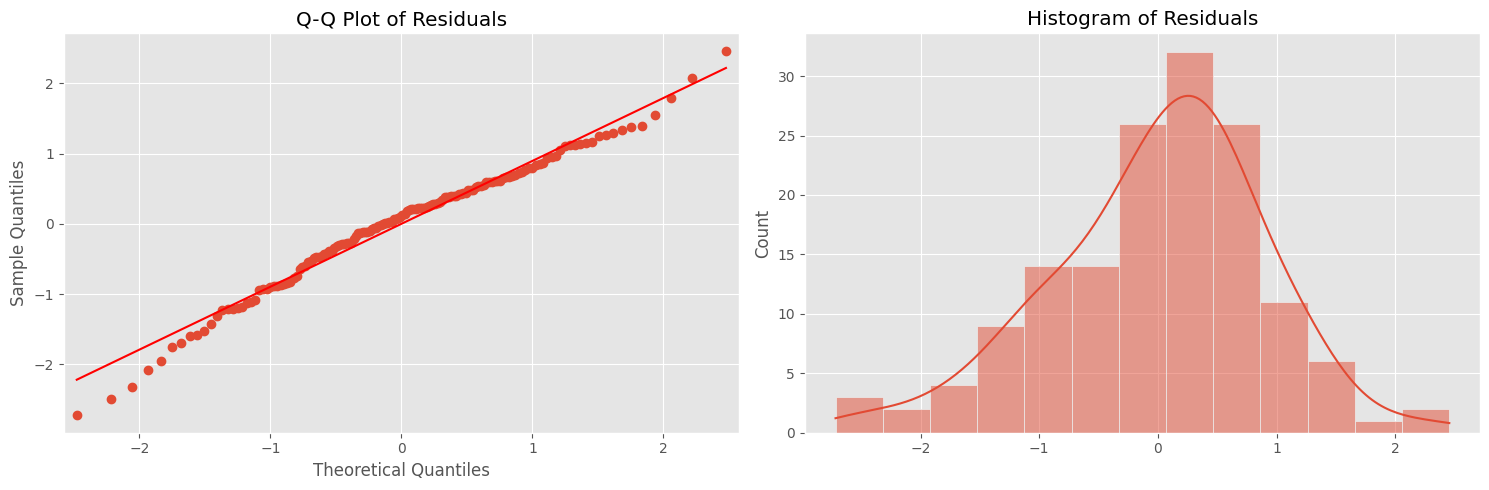

Shapiro-Wilk Test:

W Statistic: 0.9838
p-value: 0.0758

The residuals appear to be normally distributed (p > 0.05)

Jarque-Bera Test:

JB Statistic: 5.5408
p-value: 0.0626

The residuals appear to be normally distributed (p > 0.05)

Skewness and Kurtosis:
Skewness: -0.42327361749434894
Kurtosis: 0.4121654312942593


In [156]:
normality_variety = test_normality(variety_re_results)

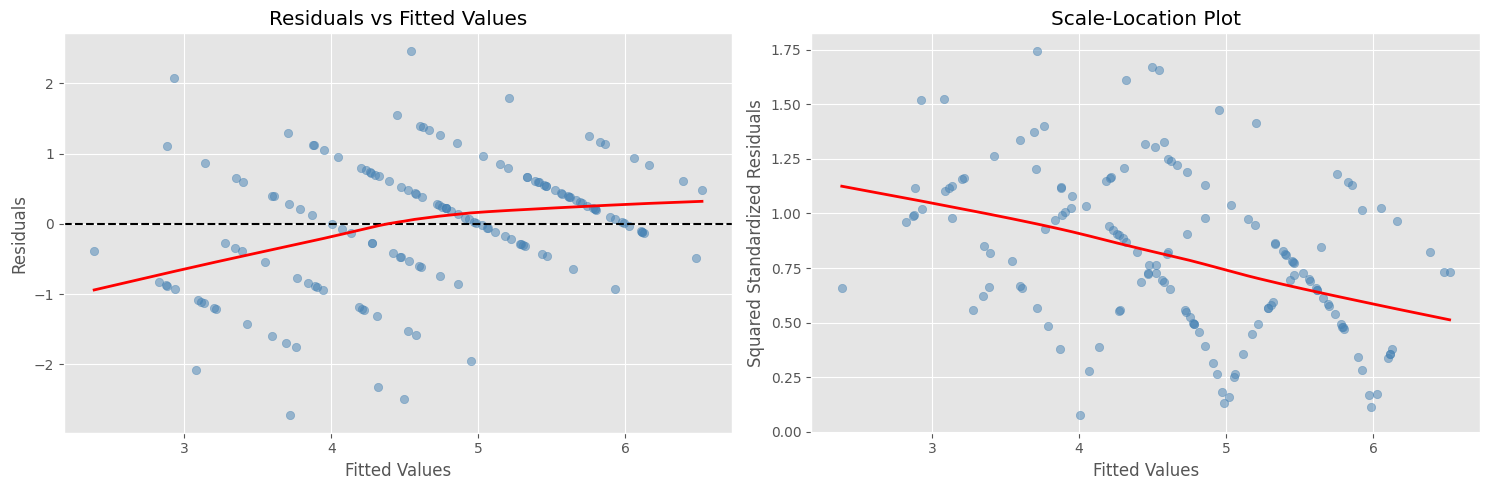

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 9.3466
p-value: 0.2287
No significant evidence of heteroscedasticity (p > 0.05)


In [157]:
homoscedasticity_variety = test_homoscedasticity(variety_re_results)

In [158]:
## Wald test
wald_test_variety = Wald_test(variety_re_results)

Wald test results:

The coefficient difference (condition_Machine_learning - condition_Rule_based) is: 0.3336
Standard Error: 0.21
z-statistic value: 1.5887
p-value: 0.1121
The 95% confidence intervals are: LB = -0.078 and UB = 0.7452


## Hypothesis II

In [159]:
## Fitting model with interactions
def random_effects_model_with_interactions(iv, dv, df):
    
    ## Rename columns for consistency
    iv = iv.rename(columns = {
        'Gaming Knowledge_std': 'Gaming_Knowledge_std', 
        'Gaming Time_std': 'Gaming_Time_std',
        'condition_Machine-learning': 'condition_Machine_learning',
        'condition_Rule-based': 'condition_Rule_based'
    })
 
    
    ## Set intereaction variables
    interaction_vars = ['Gaming_Knowledge_std', 'Challenge_std']
    
    ## Create interaction terms
    for condition in ['condition_Machine_learning', 'condition_Rule_based']:
        if condition in iv.columns:
            for var in interaction_vars:
                if var in iv.columns:
                    ## Create interaction term
                    interaction_name = f"{condition}_{var}"
                    iv[interaction_name] = iv[condition] * iv[var]
    
    
    ## Add constant
    iv.insert(0, 'constant', 1.0)
    
    ## Fit the random-intercepts model
    model_re = MixedLM(endog=dv,
                      exog=iv,
                      groups=np.array(df['ParticipantID']))
    
    results = model_re.fit()
    
    return results

- DV1: Engagement

In [160]:
## Random-Effects Model
engagement_re_interactions_results = random_effects_model_with_interactions(
    X, 
    prepared_df['Engagement_DV1'], 
    prepared_df)

print(engagement_re_interactions_results.summary())

                          Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           Engagement_DV1
No. Observations:           150               Method:                       REML          
No. Groups:                 50                Scale:                        0.7010        
Min. group size:            3                 Log-Likelihood:               -223.1577     
Max. group size:            3                 Converged:                    Yes           
Mean group size:            3.0                                                           
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
constant                                         4.502    0.546  8.239 0.000  3.431  5.573
Gender                    

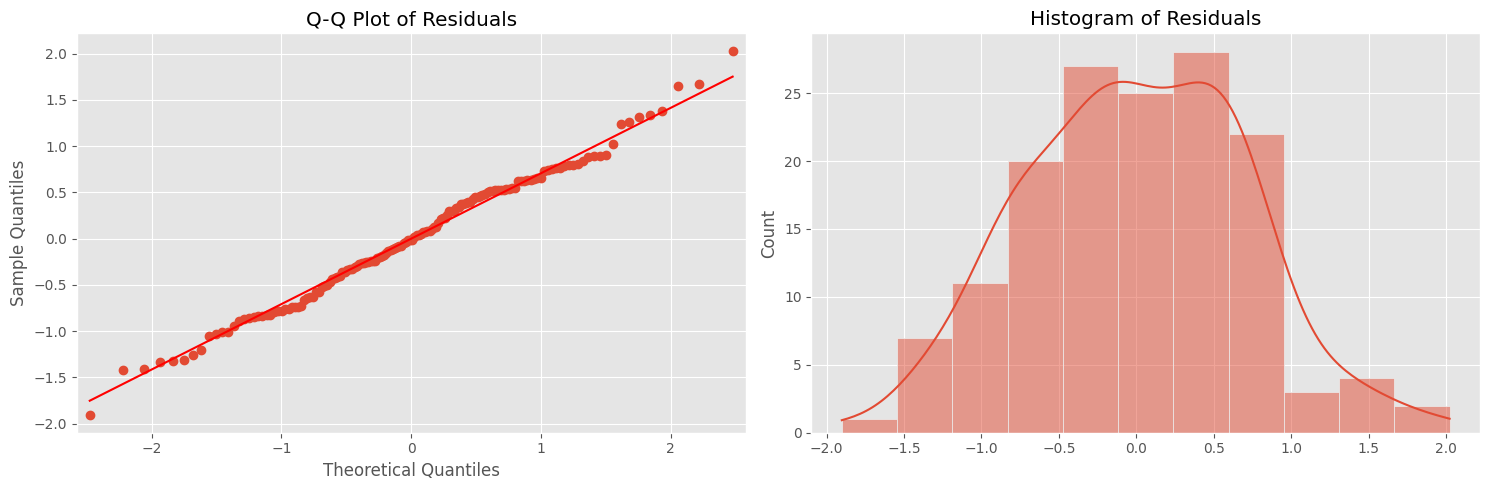

Shapiro-Wilk Test:

W Statistic: 0.9927
p-value: 0.644

The residuals appear to be normally distributed (p > 0.05)

Jarque-Bera Test:

JB Statistic: 0.2901
p-value: 0.865

The residuals appear to be normally distributed (p > 0.05)

Skewness and Kurtosis:
Skewness: 0.04301308241176179
Kurtosis: -0.19753656077814474


In [161]:
normality_engagement_interactions = test_normality(engagement_re_interactions_results)

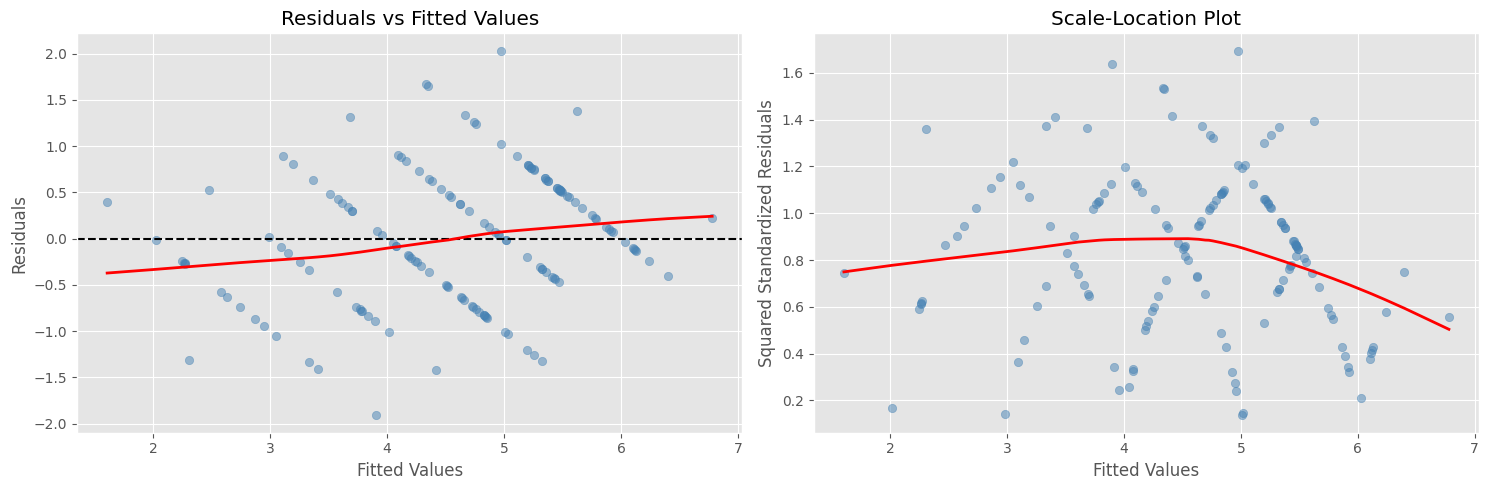

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 19.7923
p-value: 0.0483
Evidence of heteroscedasticity (p < 0.05)


In [162]:
homoscedasticity_engagement_interactions = test_homoscedasticity(engagement_re_interactions_results)

In [177]:
engagement_re_robust_se_interactions, engagement_re_robust_cov = cluster_robust_se(engagement_re_interactions_results, prepared_df['ParticipantID'])

,coef,robust_se,t,p,CI_low,CI_high
constant,4.502,0.202,22.260,0.000,4.106,4.899
Gender,-0.249,0.082,-3.038,0.004,-0.409,-0.088
Gaming Time,-0.100,0.051,-1.960,0.056,-0.201,0.000
condition_Rule_based,0.741,0.172,4.311,0.000,0.404,1.077
condition_Machine_learning,0.963,0.182,5.283,0.000,0.605,1.320
Age_centered,-0.036,0.006,-5.611,0.000,-0.049,-0.024
Challenge_std,0.694,0.102,6.809,0.000,0.494,0.893
Gaming_Knowledge_std,0.149,0.106,1.403,0.167,-0.059,0.357
condition_Machine_learning_Gaming_Knowledge_std,-0.282,0.180,-1.569,0.123,-0.635,0.070
condition_Machine_learning_Challenge_std,-0.384,0.172,-2.230,0.030,-0.721,-0.046


In [164]:
wald_test_engagement_interactions_ML = Wald_test(
    (engagement_re_robust_se_interactions,engagement_re_robust_cov), 
    coef1_name= "condition_Machine_learning_Gaming_Knowledge_std",
    coef2_name= "condition_Machine_learning_Challenge_std",
    robust= True
    )

Wald test results (Using cluster-robust standard errors):

The coefficient difference (condition_Machine_learning_Gaming_Knowledge_std - condition_Machine_learning_Challenge_std) is: 0.1013
Standard Error: 0.2168
t-statistic value: 0.4673
p-value: 0.6503
The 95% confidence intervals are: LB = -0.3236 and UB = 0.5262


In [165]:
wald_test_engagement_interactions_Rule_based = Wald_test(
    (engagement_re_robust_se_interactions,engagement_re_robust_cov), 
    coef1_name= "condition_Rule_based_Gaming_Knowledge_std",
    coef2_name= "condition_Rule_based_Challenge_std",
    robust= True
    )

Wald test results (Using cluster-robust standard errors):

The coefficient difference (condition_Rule_based_Gaming_Knowledge_std - condition_Rule_based_Challenge_std) is: -0.3848
Standard Error: 0.2054
t-statistic value: -1.8734
p-value: 0.0905
The 95% confidence intervals are: LB = -0.7874 and UB = 0.0178


- DV2: Realism

In [167]:
## Random-Effects Model
realism_re_interactions_results = random_effects_model_with_interactions(
    X, 
    prepared_df['Realism_DV2'], 
    prepared_df
    )

print(realism_re_interactions_results.summary())

                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Realism_DV2
No. Observations:            150                Method:                        REML       
No. Groups:                  50                 Scale:                         1.6478     
Min. group size:             3                  Log-Likelihood:                -265.0397  
Max. group size:             3                  Converged:                     Yes        
Mean group size:             3.0                                                          
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
constant                                         2.910    0.585  4.977 0.000  1.764  4.056
Gender                    

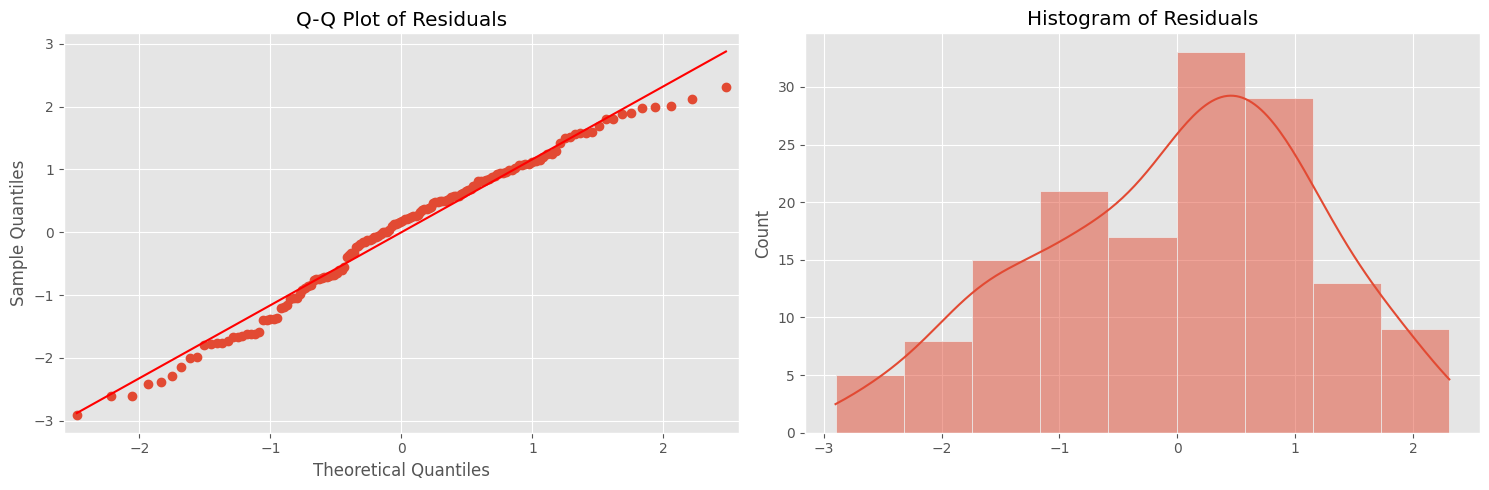

Shapiro-Wilk Test:

W Statistic: 0.9785
p-value: 0.0186

The residuals do not appear to be normally distributed (p < 0.05)

Jarque-Bera Test:

JB Statistic: 4.8708
p-value: 0.0876

The residuals appear to be normally distributed (p > 0.05)

Skewness and Kurtosis:
Skewness: -0.3374078827751127
Kurtosis: -0.5691715514760767


In [168]:
normality_realism_interactions = test_normality(realism_re_interactions_results)

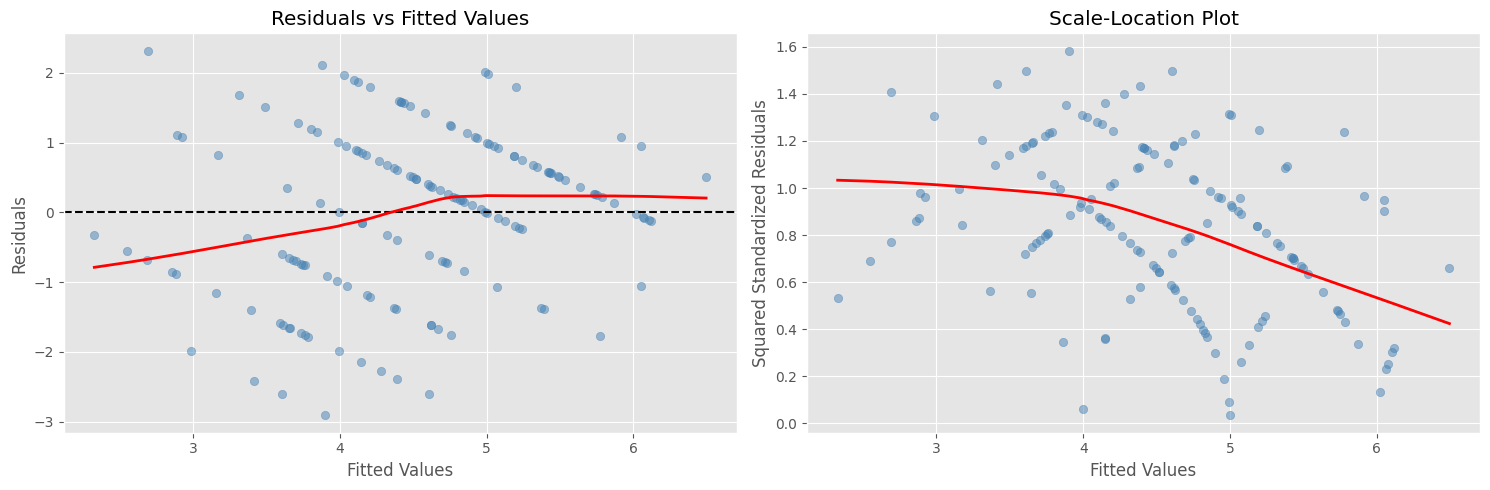

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 15.2298
p-value: 0.1722
No significant evidence of heteroscedasticity (p > 0.05)


In [169]:
homoscedasticity_realism_interactions = test_homoscedasticity(realism_re_interactions_results)

In [170]:
wald_test_realism_interactions_ML = Wald_test(
    realism_re_interactions_results,
    coef1_name= "condition_Machine_learning_Gaming_Knowledge_std",
    coef2_name= "condition_Machine_learning_Challenge_std",
    robust= False
    )

Wald test results:

The coefficient difference (condition_Machine_learning_Gaming_Knowledge_std - condition_Machine_learning_Challenge_std) is: -0.3432
Standard Error: 0.3363
z-statistic value: -1.0205
p-value: 0.3075
The 95% confidence intervals are: LB = -1.0023 and UB = 0.3159


In [171]:
wald_test_realism_interactions_Rule_based = Wald_test(
    realism_re_interactions_results, 
    coef1_name= "condition_Rule_based_Gaming_Knowledge_std",
    coef2_name= "condition_Rule_based_Challenge_std",
    robust= False
    )

Wald test results:

The coefficient difference (condition_Rule_based_Gaming_Knowledge_std - condition_Rule_based_Challenge_std) is: -0.7506
Standard Error: 0.3306
z-statistic value: -2.2703
p-value: 0.0232
The 95% confidence intervals are: LB = -1.3986 and UB = -0.1026


- DV3: Variety

In [172]:
## Random-Effects Model
variety_re_interactions_results = random_effects_model_with_interactions(
    X, 
    prepared_df['Variety_DV3'], 
    prepared_df)

print(variety_re_interactions_results.summary())

                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Variety_DV3
No. Observations:            150                Method:                        REML       
No. Groups:                  50                 Scale:                         1.0061     
Min. group size:             3                  Log-Likelihood:                -250.8707  
Max. group size:             3                  Converged:                     Yes        
Mean group size:             3.0                                                          
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
constant                                         3.819    0.695  5.497 0.000  2.458  5.181
Gender                    

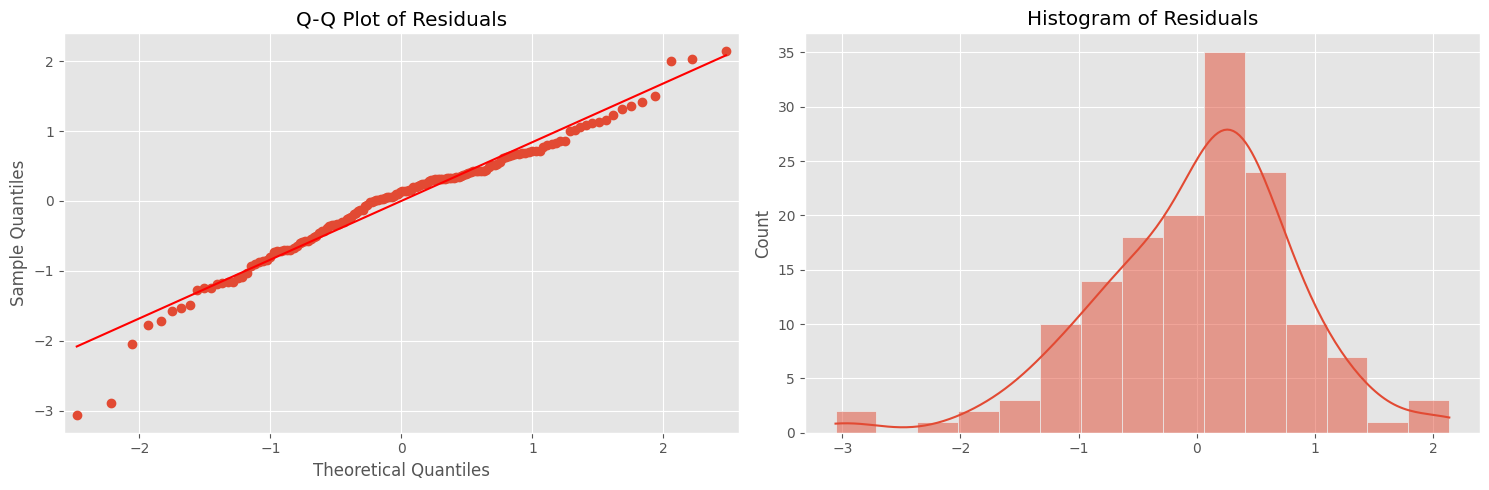

Shapiro-Wilk Test:

W Statistic: 0.9716
p-value: 0.0034

The residuals do not appear to be normally distributed (p < 0.05)

Jarque-Bera Test:

JB Statistic: 18.7949
p-value: 0.0001

The residuals do not appear to be normally distributed (p < 0.05)

Skewness and Kurtosis:
Skewness: -0.5690757835500201
Kurtosis: 1.3083562514236906


In [173]:
normality_variety_interactions = test_normality(variety_re_interactions_results)

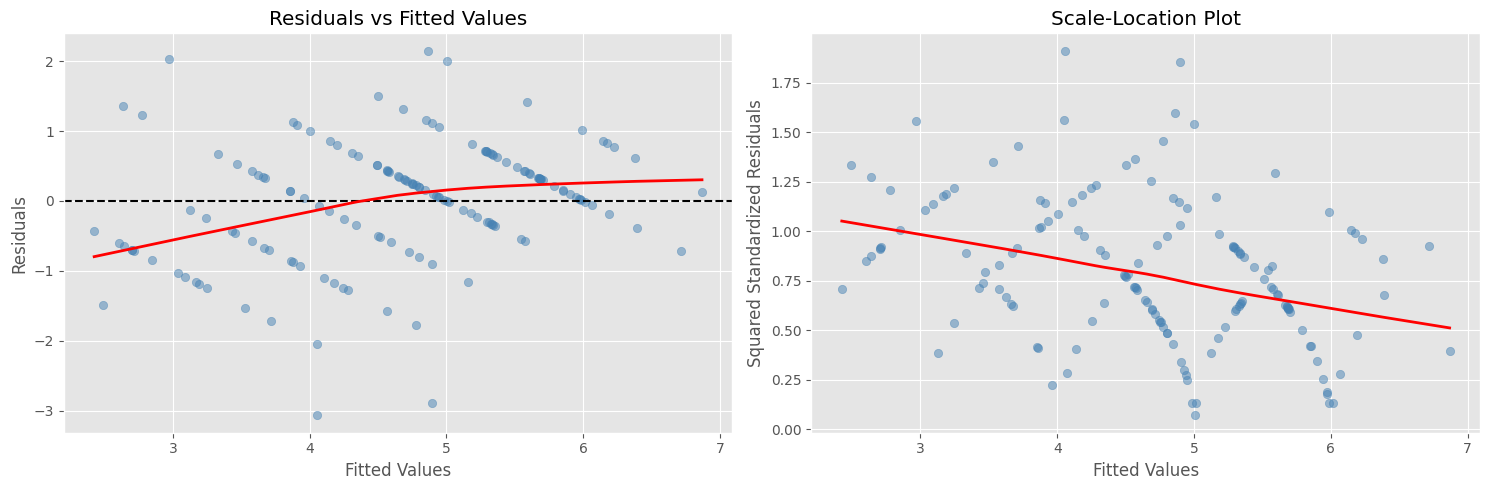

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 6.8059
p-value: 0.8146
No significant evidence of heteroscedasticity (p > 0.05)


In [174]:
homoscedasticity_variety_interactions = test_homoscedasticity(variety_re_interactions_results)

In [175]:
wald_test_variety_interactions_ML = Wald_test(
    variety_re_interactions_results, 
    coef1_name= "condition_Machine_learning_Gaming_Knowledge_std",
    coef2_name= "condition_Machine_learning_Challenge_std",
    robust= False
    )

Wald test results:

The coefficient difference (condition_Machine_learning_Gaming_Knowledge_std - condition_Machine_learning_Challenge_std) is: -0.2725
Standard Error: 0.2672
z-statistic value: -1.0197
p-value: 0.3079
The 95% confidence intervals are: LB = -0.7962 and UB = 0.2512


In [176]:
wald_test_variety_interactions_ML = Wald_test(
    variety_re_interactions_results,
    coef1_name= "condition_Rule_based_Gaming_Knowledge_std",
    coef2_name= "condition_Rule_based_Challenge_std",
    robust= False
    )

Wald test results:

The coefficient difference (condition_Rule_based_Gaming_Knowledge_std - condition_Rule_based_Challenge_std) is: -0.3616
Standard Error: 0.2606
z-statistic value: -1.3875
p-value: 0.1653
The 95% confidence intervals are: LB = -0.8725 and UB = 0.1492
